In [ ]:
!pip install networkx

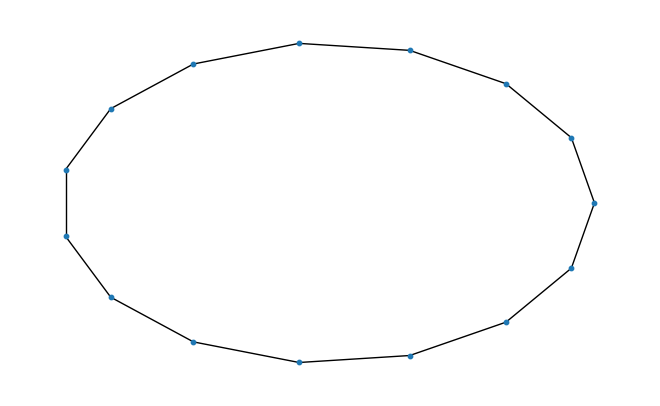

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_ellipse_graph(num_nodes, a, b):
    """
    Creates an approximation of an ellipse using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the ellipse.
    - a: Semi-major axis of the ellipse.
    - b: Semi-minor axis of the ellipse.

    Returns:
    - G: A networkx graph representing the ellipse.
    """
    G = nx.Graph()

    # Add nodes and position them along the ellipse
    for i in range(num_nodes):
        theta = 2 * np.pi * i / num_nodes  # Angle for this node
        x = a * np.cos(theta)
        y = b * np.sin(theta)
        G.add_node(i, pos=(x, y))

    # Add edges between consecutive nodes to form the ellipse
    for i in range(num_nodes):
        G.add_edge(i, (i + 1) % num_nodes)

    return G

# Create an ellipse graph
num_nodes = 15  # Number of nodes to use for the approximation
a, b = 5, 3  # Semi-major and semi-minor axes
ellipse_graph = create_ellipse_graph(num_nodes, a, b)

# Draw the graph
pos = nx.get_node_attributes(ellipse_graph, 'pos')
nx.draw(ellipse_graph, pos, node_size=10, with_labels=False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the plot is not distorted
plt.show()


In [ ]:
a = nx.to_numpy_array(ellipse_graph).astype(np.float32)

In [ ]:
a

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.

In [ ]:
import random

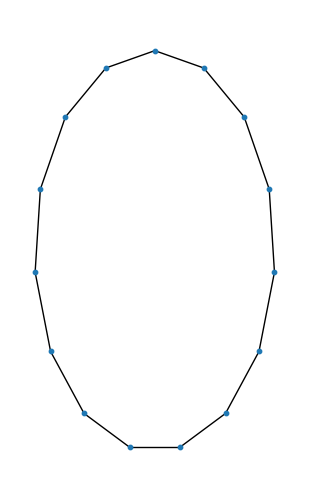

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_rotated_ellipse_graph(num_nodes, a, b):
    """
    Creates an approximation of a rotated ellipse using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the ellipse.
    - a: Semi-major axis of the ellipse.
    - b: Semi-minor axis of the ellipse.

    Returns:
    - G: A networkx graph representing the rotated ellipse.
    """
    G = nx.Graph()

    # Add nodes and position them along the rotated ellipse
    for i in range(num_nodes):
        theta = 2 * np.pi * i / num_nodes  # Angle for this node
        x = b * np.sin(theta)  # Swapped x and y for rotation
        y = a * np.cos(theta)
        G.add_node(i, pos=(x, y))

    # Add edges between consecutive nodes to form the ellipse
    for i in range(num_nodes):
        G.add_edge(i, (i + 1) % num_nodes)

    return G

# Create a rotated ellipse graph
num_nodes = 15  # Number of nodes to use for the approximation
a, b = 5, 3  # Semi-major and semi-minor axes
rotated_ellipse_graph = create_rotated_ellipse_graph(num_nodes, a, b)

# Draw the graph
pos = nx.get_node_attributes(rotated_ellipse_graph, 'pos')
nx.draw(rotated_ellipse_graph, pos, node_size=10, with_labels=False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the plot is not distorted
plt.show()


In [ ]:
from collections import defaultdict
import pickle
from BAPG import *
import torch
import time
import os
import argparse

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
def defaul():
    return defaultdict(list)


def BAPG_torch(A, B, a=None, b=None, X=None, epoch=200, eps=1e-5, rho=1e-1):
    if a is None:
        #a = torch.ones([A.shape[0], 1], dtype=A.dtype).cuda()/A.shape[0]
        a = torch.ones([A.shape[0], 1], dtype=A.dtype)/A.shape[0]
    if b is None:
        #b = torch.ones([B.shape[0], 1], dtype=A.dtype).cuda()/B.shape[0]
        b = torch.ones([B.shape[0], 1], dtype=A.dtype)/B.shape[0]
    if X is None:
        X = a@b.T
    obj_list, obj1_list, obj2_list, gap_list = [], [], [], []
    for ii in range(epoch):
        X = X + 1e-10
        X = torch.exp(A@X@B/rho)*X
        pi = X * (a / (X @ torch.ones_like(b)))
        X = torch.exp(A@pi@B/rho)*pi
        X = X * (b.T / (X.T @ torch.ones_like(a)).T)
        if (ii+1) % 50 == 0:
            objective = -torch.trace(A @ X @ B @ X.T).item()
            X2 = (X+pi)/2
            gap = (X2.sum(0)-b.squeeze(-1)).norm() + (X2.sum(1)-a.squeeze(-1)).norm()
            gap_list.append(gap.item())
            if len(obj_list) > 0 and np.abs((objective-obj_list[-1])/obj_list[-1]) < eps:
                print('iter:{}, smaller than eps'.format(ii))
                obj_list.append(objective)
                break
            obj_list.append(objective)
    return X2, obj_list, gap_list


def BAPG_numpy(A, B, a=None, b=None, X=None, epoch=200, eps=1e-5, rho=1e-1):
    if a is None:
        a = np.ones([A.shape[0], 1], dtype=A.dtype)/A.shape[0]
    if b is None:
        b = np.ones([B.shape[0], 1], dtype=A.dtype)/B.shape[0]
    if X is None:
        X = a@b.T
    obj_list, gap_list = [], []
    for ii in range(epoch):
        X = X+1e-10
        X = np.exp(A@X@B/rho)*X
        pi = X * (a / (X @ np.ones_like(b)))
        X = np.exp(A@pi@B/rho)*pi
        X = X * (b.T / (X.T @ np.ones_like(a)).T)
        if (ii+1) % 50 == 0:
            X2 = (X+pi)/2
            gap = np.linalg.norm((X2.sum(0)-b.squeeze(-1))) + np.linalg.norm(X2.sum(1)-a.squeeze(-1))
            gap_list.append(gap.item())
            objective = -np.trace(A @ X @ B @ X.T)
            if len(obj_list) > 0 and np.abs((objective-obj_list[-1])/obj_list[-1]) < eps:
                print('iter:{}, smaller than eps'.format(ii))
                break
            obj_list.append(objective)
    return X2, obj_list, gap_list
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
database = "synthetic"
rho_list = [0.9, 0.5, 0.2, 0.1, 0.05, 0.01, 0.001]

# parser = argparse.ArgumentParser()
# parser.add_argument('--dataset', type=str, default='proteins', help='proteins / reddit / enzymes / synthetic')
# parser.add_argument('--noise_level', type=float, default=0.)
# parser.add_argument('--use_gpu', type=bool, default=False)
# parser.add_argument('--loss_fun', type=str, default='square_loss', help='square_loss/kl_loss')
# parser.add_argument('--rho', type=float, default=[0.5, 0.2, 0.1, 0.05, 0.01], nargs='+')

# args = parser.parse_args()
# rho_list = [0.5, 0.2, 0.1, 0.05, 0.01]
# database = "synthetic"
# noise_level = args.noise_level

# if database == 'proteins':
#     print('------------------Node Matching on PROTIENS---------------')
#     with open('data/PROTEINS/matching.pk', 'rb') as f:
#         graphs, _ = pickle.load(f)

# if database == 'reddit':
#     print('------------------Node Matching on REDDIT---------------')
#     with open('data/REDDIT-BINARY/matching.pk', 'rb') as f:
#         graphs = pickle.load(f)[:500]

# if database == 'enzymes':
#     print('------------------Node Matching on ENZYMES---------------')
#     with open('data/ENZYMES/matching.pk', 'rb') as f:
#         graphs = pickle.load(f)

if database == 'synthetic':
    graphs, noise_graphs = [], []
    print('------------------Node Matching on Synthetic Database---------------')
    with open('graph1.pk', 'rb') as f:
        graph_pairs = pickle.load(f)
        print(graph_pairs)
        for num_node in [100]:
            for noise_level in [0.1]:
                for G, G_noise in graph_pairs[(num_node, noise_level)]:
                    graphs.append(G)
                    noise_graphs.append(G_noise)

# if database != 'synthetic':
#     if noise_level > 0:
#         noise_graphs = []
#         for G_src in graphs:
#             G_dst = add_noisy_edges(G_src, noise_level)
#             G_dst = add_noisy_nodes(G_dst, noise_level)
#             noise_graphs.append(G_dst)
#     else:
#         noise_graphs = graphs

#################
def create_ellipse_graph(num_nodes, a, b):
    """
    Creates an approximation of an ellipse using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the ellipse.
    - a: Semi-major axis of the ellipse.
    - b: Semi-minor axis of the ellipse.

    Returns:
    - G: A networkx graph representing the ellipse.
    """
    G = nx.Graph()

    # Add nodes and position them along the ellipse
    for i in range(num_nodes):
        theta = 2 * np.pi * i / num_nodes  # Angle for this node
        x = a * np.cos(theta)
        y = b * np.sin(theta)
        G.add_node(i)

    # Add edges between consecutive nodes to form the ellipse
    for i in range(num_nodes):
        G.add_edge(i, (i + 1) % num_nodes)

    return G

def create_rotated_ellipse_graph(num_nodes, a, b):
    """
    Creates an approximation of a rotated ellipse using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the ellipse.
    - a: Semi-major axis of the ellipse.
    - b: Semi-minor axis of the ellipse.

    Returns:
    - G: A networkx graph representing the rotated ellipse.
    """
    G = nx.Graph()

    # Add nodes and position them along the rotated ellipse
    for i in range(num_nodes):
        theta = 2 * np.pi * i / num_nodes  # Angle for this node
        x = b * np.sin(theta)  # Swapped x and y for rotation
        y = a * np.cos(theta)
        G.add_node(i)

    # Add edges between consecutive nodes to form the ellipse
    for i in range(num_nodes):
        G.add_edge(i, (i + 1) % num_nodes)

    return G


def create_spiral_graph(num_nodes, num_turns, growth_rate):
    """
    Creates an approximation of a spiral using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the spiral.
    - num_turns: Number of turns in the spiral.
    - growth_rate: Rate at which the spiral grows.

    Returns:
    - G: A networkx graph representing the spiral.
    """
    G = nx.Graph()

    # Add nodes and position them along the spiral
    for i in range(num_nodes):
        angle = 2 * np.pi * num_turns * i / num_nodes  # Angle for this node
        radius = growth_rate * i / num_nodes  # Radius for this node
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        G.add_node(i, pos=(x, y))

    # Add edges between consecutive nodes to form the spiral
    for i in range(num_nodes - 1):
        G.add_edge(i, i + 1)

    return G

num_nodes = 500  # Number of nodes to use for the approximation
a, b = 5, 3  # Semi-major and semi-minor axes
ellipse_graph = create_ellipse_graph(num_nodes, a, b)

num_nodes = 500  # Number of nodes to use for the approximation
a, b = 5, 3  # Semi-major and semi-minor axes
rotated_ellipse_graph = create_rotated_ellipse_graph(num_nodes, a, b)

# graphs = [ellipse_graph]
# noise_graphs = [rotated_ellipse_graph]

graphs = [ellipse_graph]

noise_graphs = [add_noisy_nodes(add_noisy_edges(graphs[0], 0.1), 0.1)]

noise_level = 0.
#################


gap_rho = defaultdict(list)
acc_rho = defaultdict(list)
time_rho = defaultdict(list)
gap2_rho = defaultdict(list)
acc2_rho = defaultdict(list)
time2_rho = defaultdict(list)
obj_lists = []
for j in range(len(graphs)):
    print(j)
    G = graphs[j]
    G_noise = noise_graphs[j]
    G_adj = nx.to_numpy_array(G).astype(np.float32)
    G_adj_noise = nx.to_numpy_array(G_noise).astype(np.float32)
    #G_adj_gpu = torch.tensor(G_adj).cuda()
    G_adj_gpu = torch.tensor(G_adj)
    #G_adj_noise_gpu = torch.tensor(G_adj_noise).cuda()
    G_adj_noise_gpu = torch.tensor(G_adj_noise)
    m, n = G_adj.shape[0], G_adj_noise.shape[0]
    for rho in rho_list:  #0.5,0.2,0.1,0.05,
        epoch = 2000 if rho < 0.2 else 4000
        start = time.time()
        # coup_bap, obj_list, gap_list = BAPG_numpy(
        #     A=G_adj, B=G_adj_noise, epoch=2000, rho=rho, eps=1e-5, scaling=1.01, max_rho=0.5)
        if True:
            coup_bap, obj_list1, gap_list = BAPG_torch(
                A=G_adj_gpu, B=G_adj_noise_gpu, epoch=epoch, rho=rho, eps=1e-5)
            end = time.time()
            acc = node_correctness(coup_bap.cpu().numpy(), np.eye(m))
            print(rho, gap_list[-1], acc)
            acc_rho[rho].append(acc)
            time_rho[rho].append(end-start)
            gap_rho[rho].append(gap_list[-1])
            coup_bap, obj_list2, gap_list = BAPG_torch(
                A=G_adj_gpu, B=G_adj_noise_gpu, X=coup_bap, epoch=100, rho=100, eps=1e-5)
            end = time.time()
            obj_lists.append((obj_list1, obj_list2))
            acc = node_correctness(coup_bap.cpu().numpy(), np.eye(m))
            print('100', gap_list[-1], acc)
        else:
            coup_bap, obj_list1, gap_list = BAPG_numpy(
                A=G_adj, B=G_adj_noise, epoch=2000, rho=rho, eps=1e-5)
            end = time.time()
            print("fffff")
            print(obj_list1)
            print("fffff")
            acc = node_correctness(coup_bap, np.eye(m))
            print(rho, gap_list[-1], acc)
            acc_rho[rho].append(acc)
            time_rho[rho].append(end-start)
            gap_rho[rho].append(gap_list[-1])
            coup_bap, obj_list2, gap_list = BAPG_numpy(
                A=G_adj, B=G_adj_noise, X=coup_bap, epoch=100, rho=100, eps=1e-5)
            end = time.time()
            obj_lists.append((obj_list1, obj_list2))
            acc = node_correctness(coup_bap, np.eye(m))
            print('100', gap_list[-1], acc)

        acc2_rho[rho].append(acc)
        time2_rho[rho].append(end-start)
        gap2_rho[rho].append(gap_list[-1])


for rho in rho_list:
    print('rho:{},gap:{:.2e},acc:{:.2f},time:{:.1f},gap2:{:.2e},acc2:{:.2f},time2:{:.1f}'.format(
        rho, np.mean(gap_rho[rho]), np.mean(acc_rho[rho])*100, np.sum(time_rho[rho]),
        np.mean(gap2_rho[rho]), np.mean(acc2_rho[rho])*100, np.sum(time2_rho[rho])))

    with open('result.txt', 'a+') as f:
        f.write('Data:{},Noise:{},rho:{},gap:{:.2e},acc:{:.2f},time:{:.1f},gap2:{:.2e},acc2:{:.2f},time2:{:.1f}\n'.format(
            database, noise_level, rho, np.mean(gap_rho[rho]), np.mean(acc_rho[rho])*100, np.sum(time_rho[rho]),
            np.mean(gap2_rho[rho]), np.mean(acc2_rho[rho])*100, np.sum(time2_rho[rho])))
print('-'*10)
print(type(G), type(G_noise), sep="    ")
print('-'*3)
print(type(G_adj), type(G_adj_noise), sep="    ")
print('-'*10)

import matplotlib.pyplot as plt

# nx.draw_networkx(G, with_labels=True, node_size=10, pos=nx.spring_layout(G), font_size=8, width=0.1)
# plt.savefig("G.png")
# nx.draw_networkx(G_noise, with_labels=True, node_size=10, font_size=8, width=0.1)
# plt.savefig("G_noise.png")



print('-'*10)
print(obj_lists)

------------------Node Matching on Synthetic Database---------------
{(100, 0.1): [(<networkx.classes.graph.Graph object at 0x78e96dddd480>, <networkx.classes.graph.Graph object at 0x78e96dddd480>)]}
0
iter:149, smaller than eps
0.9 1.9224083303015504e-07 0.002
iter:99, smaller than eps
100 9.47315612620514e-08 0.002
iter:99, smaller than eps
0.5 1.7224476778210374e-07 0.002
iter:99, smaller than eps
100 1.1634217855771567e-07 0.002
iter:99, smaller than eps
0.2 5.262180025056296e-07 0.002
iter:99, smaller than eps
100 1.1981992997789348e-07 0.002
iter:99, smaller than eps
0.1 9.861555554380175e-07 0.002
iter:99, smaller than eps
100 1.3796662301501783e-07 0.002
iter:99, smaller than eps
0.05 2.078199031529948e-06 0.002
iter:99, smaller than eps
100 1.1754808326713828e-07 0.002
iter:99, smaller than eps
0.01 9.993379535444546e-06 0.002
iter:99, smaller than eps
100 1.3785324881609995e-07 0.002
iter:99, smaller than eps
0.001 0.0001000818592729047 0.002
iter:99, smaller than eps
100 1.5

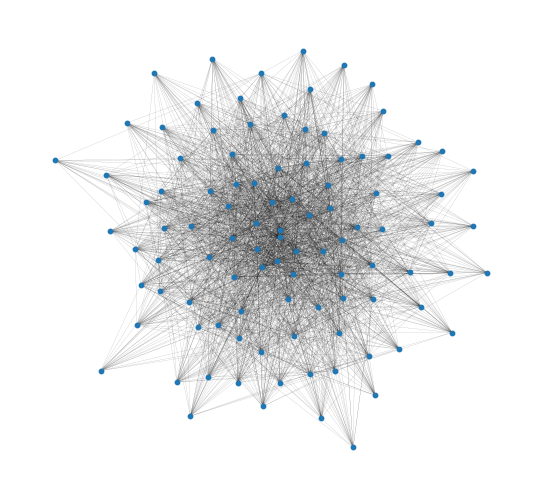

In [ ]:
# pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, node_size=10, with_labels=False, width=0.05)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the plot is not distorted
plt.show()



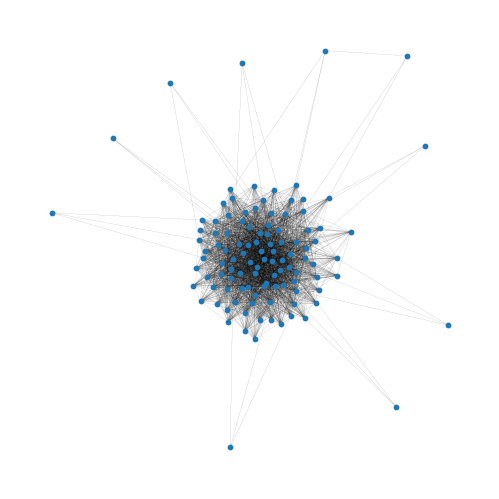

In [ ]:
# pos = nx.get_node_attributes(G_noise, 'pos')
nx.draw(G_noise, node_size=10, with_labels=False, width=0.05)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the plot is not distorted
plt.show()

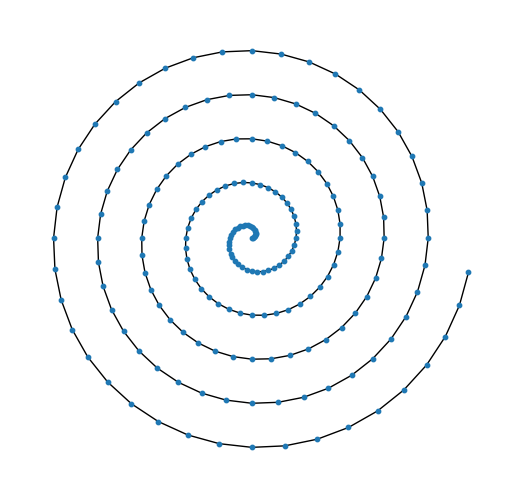

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_spiral_graph(num_nodes, num_turns, growth_rate):
    """
    Creates an approximation of a spiral using a graph.

    Parameters:
    - num_nodes: Number of nodes to create along the spiral.
    - num_turns: Number of turns in the spiral.
    - growth_rate: Rate at which the spiral grows.

    Returns:
    - G: A networkx graph representing the spiral.
    """
    G = nx.Graph()

    # Add nodes and position them along the spiral
    for i in range(num_nodes):
        angle = 2 * np.pi * num_turns * i / num_nodes  # Angle for this node
        radius = growth_rate * i / num_nodes  # Radius for this node
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        G.add_node(i, pos=(x, y))

    # Add edges between consecutive nodes to form the spiral
    for i in range(num_nodes - 1):
        G.add_edge(i, i + 1)

    return G

# Create a spiral graph
num_nodes = 200  # Number of nodes to use for the approximation
num_turns = 5  # Number of turns in the spiral
growth_rate = 10  # Rate at which the spiral grows
spiral_graph = create_spiral_graph(num_nodes, num_turns, growth_rate)

# Draw the graph
pos = nx.get_node_attributes(spiral_graph, 'pos')
nx.draw(spiral_graph, pos, node_size=10, with_labels=False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure the plot is not distorted
plt.show()
